<a href="https://colab.research.google.com/github/myroslava-bt/python_for_ds_tasks/blob/main/%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Pandas_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [ ]:
!pip install pandas matplotlib seaborn plotly==6.1.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 70.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/data/yulu_rental.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [7]:
yulu_rental = pd.read_csv('/content/drive/MyDrive/data/yulu_rental.csv')
yulu_rental.head()
##Даних 10886 рядків, 14 колонок, деталізація по годинах.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Даних 10886 рядків, 14 колонок.
В кожному рядку сума оренд велосипедів за 1 годину.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


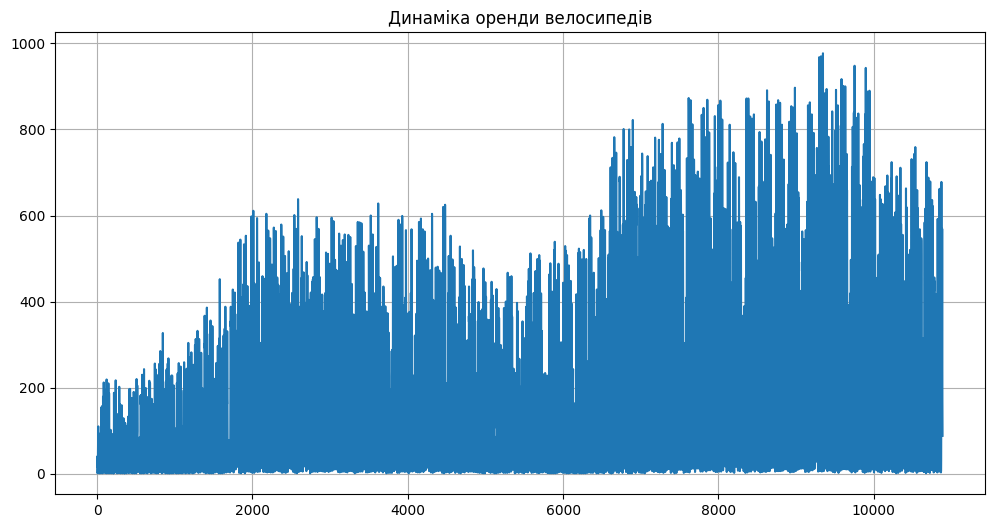

In [8]:
yulu_rental['count'].plot(figsize=(12,6), title="Динаміка оренди велосипедів")
plt.grid()
##1. можливими причинами можуть бути вихідні дні, свята або погодні умови. Дивитись дані по тижнях або місяцях. 2. кількість оренд зростає з часом.
##3. так, у певні періоди, напевно літо, кількість оренд більша. 4. так, низькі - можливо через погодні умови, високі - можуть бути наприклад під час подій, спортивних заходів.


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

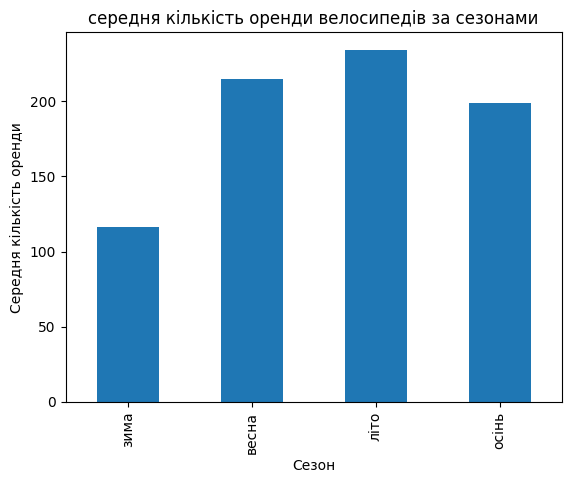

In [19]:
yulu_rental.groupby('season')['count'].mean().plot(kind='bar',
                                                   title='середня кількість оренди велосипедів за сезонами',
                                                   xlabel='Сезон',
                                                   ylabel='Середня кількість оренди',
                                                  )
plt.xticks([0, 1, 2, 3], ['зима','весна','літо','осінь'])
plt.show()
##1. влітку. 2. влітку тепліший клімат і у людей більше вільного часу щоб кататись на велосипедах. 3. у 2 рази.

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


In [27]:
yulu_rental.index = pd.to_datetime(yulu_rental.index)

In [42]:
monthly_sales = yulu_rental['count'].resample('ME').sum()
monthly_sales

,count
1970-01-31,2085476


/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


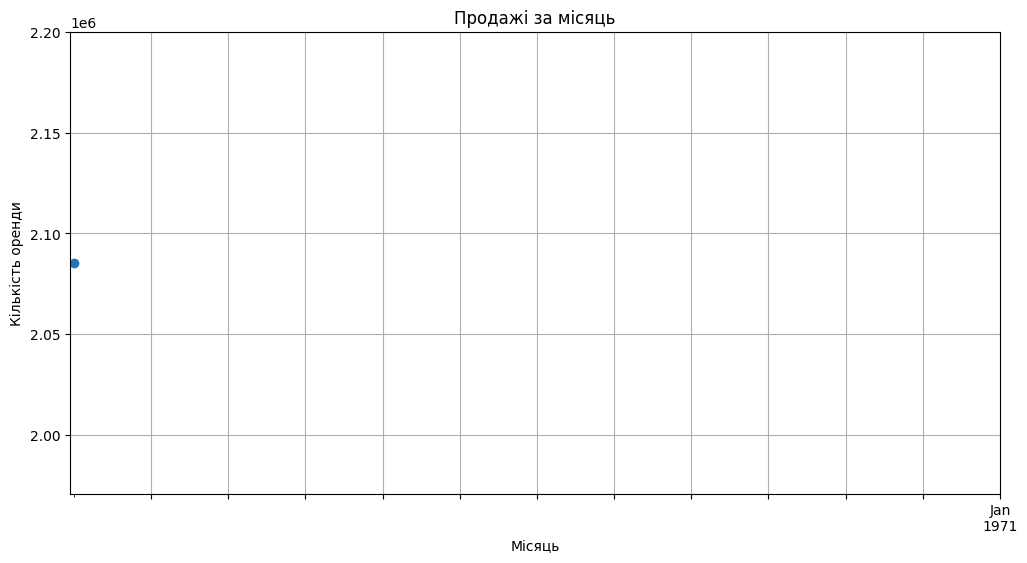

In [43]:
monthly_sales.plot(kind='line',
                   figsize=(12, 6),
                   marker='o',
                   grid=True,
                   title='Продажі за місяць',
                   xlabel='Місяць',
                   ylabel='Кількість оренди'
                   )
plt.xticks(range(1, 13))
plt.show()

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму частки днів з різними погодними умовами.
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

In [ ]:
##1.переважає ясна погода. 2.ні, немає. 3. попит буде вищим у ясні дні, фдже краще кататися без дощу і туману.

In [41]:
weather_counts = yulu_rental['weather'].value_counts()
weather_counts

,count
weather,
1,7192
2,2834
3,859
4,1


<Axes: title={'center': 'Частка днів з різними погодніми умовами'}, ylabel='count'>

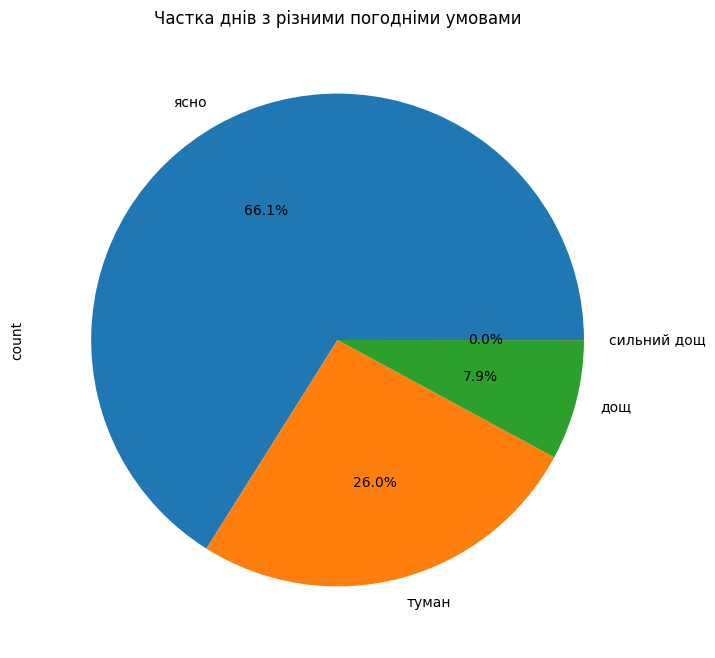

In [48]:
weather_counts.plot(kind='pie',
                    figsize=(8, 8),
                    autopct='%1.1f%%',
                    labels=['ясно', 'туман', 'дощ', 'сильний дощ'],
                    title='Частка днів з різними погодніми умовами'
                    )

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

In [ ]:
##1. При ясній погоді. 2. Так. При ясній, туманній і дощовій. 3. При ясній зелена лінія знаходиться далі, ніж у інших.

In [49]:
weather_counts = yulu_rental['weather'].value_counts()
weather_counts

,count
weather,
1,7192
2,2834
3,859
4,1


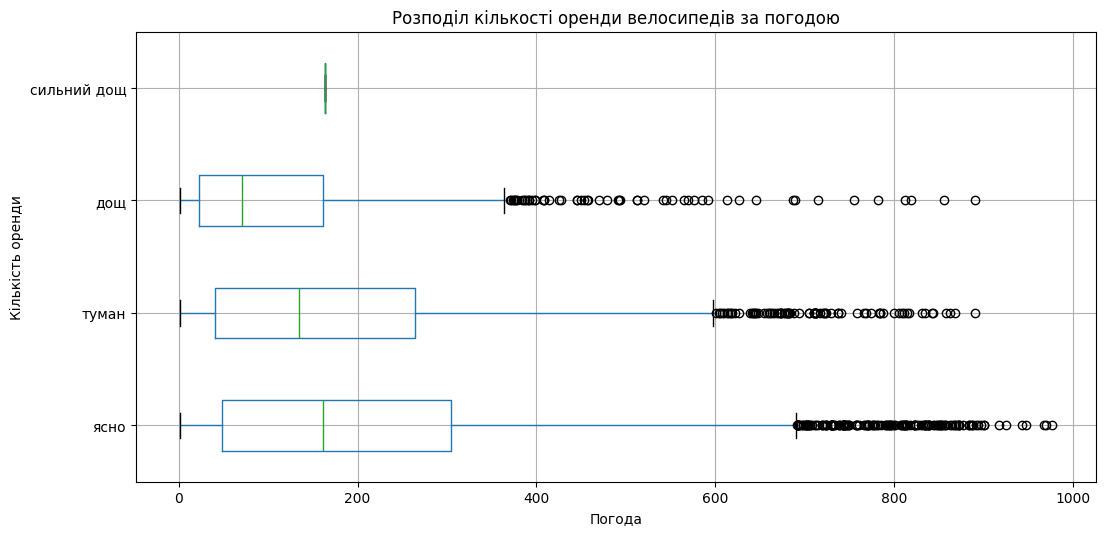

In [70]:
yulu_rental.boxplot(column='count',
                    by='weather',
                    figsize=(12, 6),
                    vert=False,
                    grid=True
                    )
plt.title('Розподіл кількості оренди велосипедів за погодою')
plt.suptitle('')
plt.xlabel('Погода')
plt.ylabel('Кількість оренди')
plt.yticks([1, 2, 3, 4], ['ясно', 'туман', 'дощ', 'сильний дощ'])
plt.show()

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

In [ ]:
##1.Так, є. Зі збільшенням температури кількість оренди зростає.

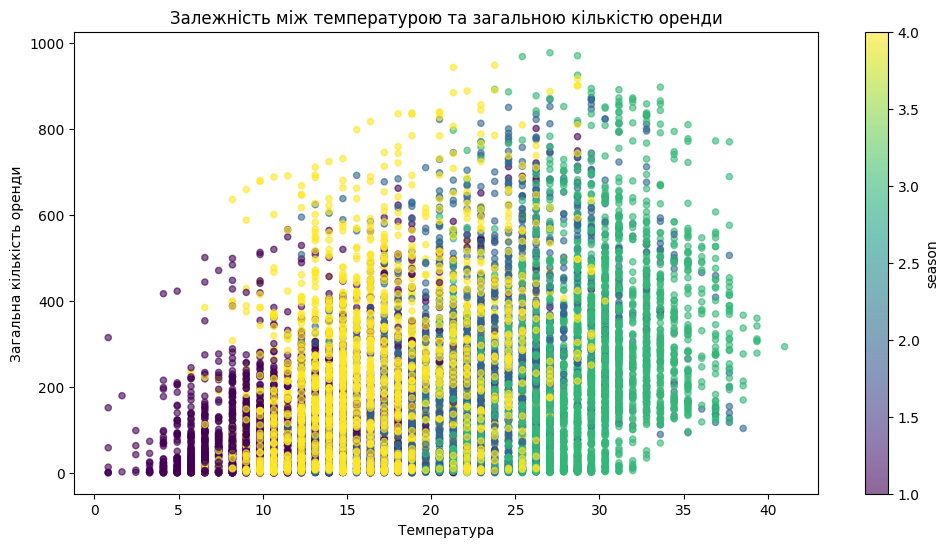

In [81]:
temp_count_scatter = yulu_rental.plot.scatter(x='temp',
                                              y='count',
                                              c='season',
                                              colormap='viridis',
                                              alpha=0.6,
                                              figsize=(12, 6)
                                              )
plt.title('Залежність між температурою та загальною кількістю оренди')
plt.xlabel('Температура')
plt.ylabel('Загальна кількість оренди')
plt.show()

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?